Po uzoru na skriptu https://github.com/ageron/handson-ml/blob/master/03_classification.ipynb


##MNIST handwritten digits 


In [ ]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1)
mnist.keys()


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
mnist.data.shape

(70000, 784)

In [ ]:
mnist.data

In [ ]:
mnist['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
import numpy as np
podaci=np.array(mnist.data)

In [ ]:
prvi_broj=podaci[0]
prvi_broj_slika=prvi_broj.reshape(28,28)
prvi_broj_slika

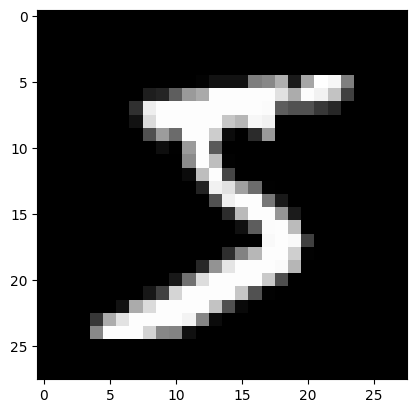

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(prvi_broj_slika,cmap="gray")
plt.show()

In [ ]:
mnist.target[0]

'5'

The main objective of database normalization is to eliminate redundant data, minimize data modification errors, and simplify the query process. Ultimately, normalization goes beyond simply standardizing data, and can even improve workflow, increase security, and lessen costs.

In [ ]:
X=podaci[0:1000,:]/255   #na prvih 1000 usput i normalizirati podatke 
y=np.array(mnist.target[0:1000])

In [ ]:
y[np.where(y!='5')]=0
y

In [ ]:
y[np.where(y=='5')]=1
y

In [ ]:
y=y.astype(int)
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_trian,y_test=train_test_split(X,y,test_size=0.30, random_state=42)

In [ ]:
X_train.shape

(700, 784)

##Logistic regression

Koristimo: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.)

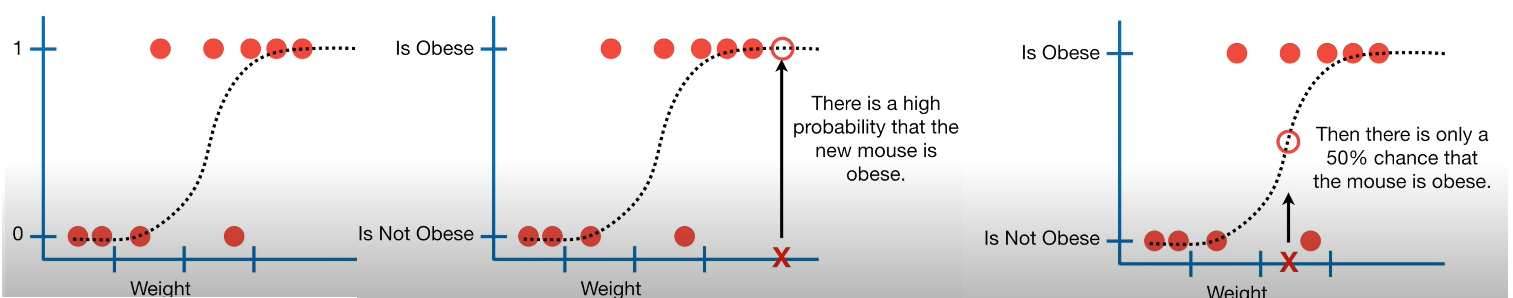

Više o logističkog regresiji na poveznici od 03:10: https://www.youtube.com/watch?v=yIYKR4sgzI8&ab_channel=StatQuestwithJoshStarmer

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LogR=LogisticRegression()   

In [ ]:
model_LogR.fit(X_train,y_trian)

LogisticRegression()

In [ ]:
model_LogR.score(X_test,y_test)

0.9566666666666667

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model_LogR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       273
           1       0.85      0.63      0.72        27

    accuracy                           0.96       300
   macro avg       0.91      0.81      0.85       300
weighted avg       0.95      0.96      0.95       300



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,model_LogR.predict(X_test))

array([[270,   3],
       [ 10,  17]])

In [ ]:
y_pred_LogR=model_LogR.predict(X_test)

In [ ]:
y_test.shape

(300,)

In [ ]:
misclassified_index=[]
for i in range (y_test.shape[0]):
  if y_test[i]!=y_pred_LogR[i]:
    misclassified_index.append(i)


In [ ]:
misclassified_index

[2, 15, 46, 51, 104, 106, 147, 166, 174, 204, 226, 242, 257]

In [ ]:
X_test.shape

(300, 784)

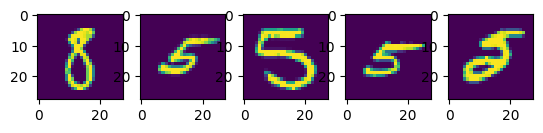

In [ ]:
for i,index in enumerate(misclassified_index[0:5]):
  plt.subplot(1,5,i+1)
  plt.imshow(X_test[misclassified_index[i]].reshape(28,28))
plt.show()

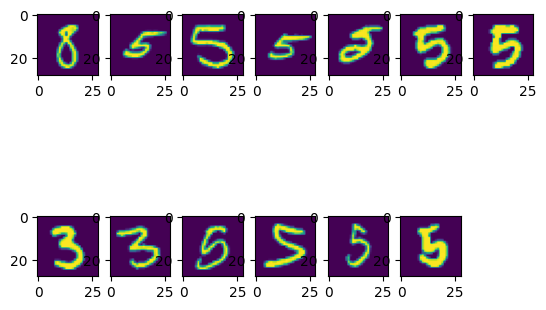

In [ ]:
for i,index in enumerate(misclassified_index[0:14]):
  plt.subplot(2,7,i+1)
  plt.imshow(X_test[misclassified_index[i]].reshape(28,28))
plt.show()

###ROC analiza

Više o ROC analizi (u kombinaciji sa logističkom regresijom) pogledajte na: https://www.youtube.com/watch?v=4jRBRDbJemM&ab_channel=StatQuestwithJoshStarmer

* Korisno za usporedbu više modela.
* bolje korisiti precision/recall kada je pozitivnih klasa malo
* što je veća TPR, više false positiva ce klasifikator proizvesti


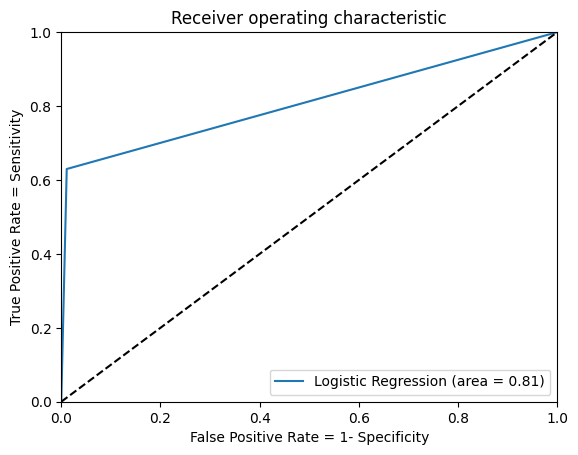

[2 1 0]


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred_LogR) #površina ispd krivulje
fpr, tpr, thresholds = roc_curve(y_test, y_pred_LogR)  #crtanje krivulje
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--') #dijagonala
plt.axis([0, 1, 0, 1]) #
plt.xlabel('False Positive Rate = 1- Specificity')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


###Primjena na više klasa

In [ ]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1)
mnist.keys()

In [ ]:
X=np.array(mnist.data)
y=np.array(mnist.target).astype(int)

In [ ]:
X=X[0:1000,:]/255
y=y[0:1000]

In [ ]:
#podjela na skupove
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, \
                                                    random_state=42)

####Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LogR=LogisticRegression(max_iter=1000)  #

In [ ]:
model_LogR.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
model_LogR.score(X_test,y_test)

0.8766666666666667

In [ ]:
y_pred_LogR=model_LogR.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_LogR))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       0.88      0.97      0.92        30
           2       0.78      0.86      0.82        29
           3       0.86      0.89      0.88        36
           4       0.85      0.88      0.86        25
           5       0.87      0.74      0.80        27
           6       0.89      0.91      0.90        34
           7       0.94      0.86      0.90        37
           8       0.81      0.91      0.86        23
           9       0.96      0.74      0.84        31

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.87       300
weighted avg       0.88      0.88      0.88       300



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_LogR)

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 25,  1,  0,  0,  1,  0,  2,  0],
       [ 0,  0,  3, 32,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 22,  1,  1,  0,  0,  1],
       [ 0,  0,  1,  2,  1, 20,  1,  0,  2,  0],
       [ 1,  2,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  2,  1,  0,  1,  0,  0, 32,  1,  0],
       [ 0,  0,  0,  0,  0,  1,  1,  0, 21,  0],
       [ 1,  0,  1,  2,  2,  0,  0,  2,  0, 23]])

In [ ]:
misclassified_index=[]
for i in range(y_test.shape[0]):
  if y_test[i] != y_pred_LogR[i]:
    misclassified_index.append(i)

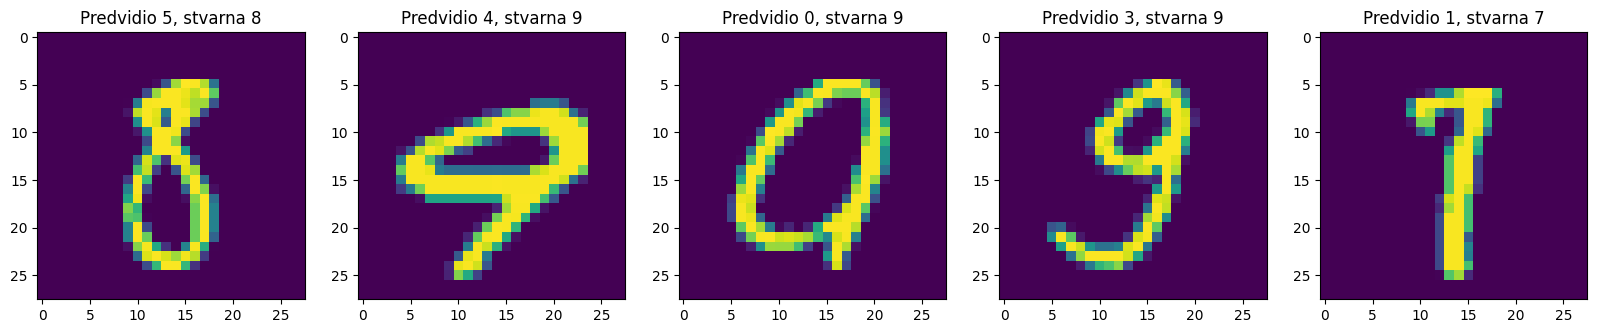

In [ ]:
plt.figure(figsize=(20,20))
for i,index in enumerate(misclassified_index[0:5]):
  plt.subplot(151+i)
  plt.imshow(X_test[misclassified_index[i]].reshape(28,28))
  plt.title('Predvidio {}, stvarna {}'.format(y_pred_LogR[misclassified_index[i]],y_test[misclassified_index[i]]))
  #format(y_pred_LogR[misclassified_index[i]],y_test[misclassified_index[i]]))
plt.show()

####Support Vector Machine

Više o SVM na poveznici: https://www.youtube.com/watch?v=efR1C6CvhmE&t=644s&ab_channel=StatQuestwithJoshStarmer

Koristimo biblioteku: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
from sklearn import svm
model_svm=svm.SVC()
model_svm.fit(X_train,y_train)

SVC()

In [ ]:
model_svm.score(X_test,y_test)

0.9066666666666666

In [ ]:
y_pred_svm=model_svm.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       0.85      0.97      0.91        30
           2       0.84      0.93      0.89        29
           3       1.00      0.89      0.94        36
           4       0.83      0.96      0.89        25
           5       0.89      0.93      0.91        27
           6       0.97      0.91      0.94        34
           7       0.97      0.81      0.88        37
           8       0.88      0.91      0.89        23
           9       0.93      0.81      0.86        31

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [ ]:
confusion_matrix(y_test, y_pred_svm)

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 27,  0,  1,  0,  0,  0,  1,  0],
       [ 1,  0,  1, 32,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 24,  0,  0,  0,  0,  1],
       [ 0,  0,  1,  0,  0, 25,  1,  0,  0,  0],
       [ 1,  2,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  3,  0,  0,  2,  0,  0, 30,  1,  1],
       [ 0,  0,  1,  0,  0,  1,  0,  0, 21,  0],
       [ 1,  0,  1,  0,  2,  0,  0,  1,  1, 25]])